# Proyek: Menyelesaikan Permasalahan Human Resources

- Nama: Permata Ayu Rahmawati
- Email: permathaayu21@gmail.com
- Id Dicoding: permatayra

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score,
                           recall_score, f1_score, roc_auc_score,
                           classification_report, confusion_matrix)
import joblib
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

### Menyiapkan data yang akan diguankan

In [ ]:
# Load dataset
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv'
df = pd.read_csv(url)

## Data Understanding

In [ ]:
print("Shape awal:", df.shape)

Shape awal: (1470, 35)


In [ ]:
print("Informasi Dataset")
print(df.info())

Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int

In [ ]:
print("\n Statistik Deskriptif")
print(df.describe(include='all'))


 Statistik Deskriptif
         EmployeeId          Age    Attrition BusinessTravel    DailyRate  \
count   1470.000000  1470.000000  1058.000000           1470  1470.000000   
unique          NaN          NaN          NaN              3          NaN   
top             NaN          NaN          NaN  Travel_Rarely          NaN   
freq            NaN          NaN          NaN           1043          NaN   
mean     735.500000    36.923810     0.169187            NaN   802.485714   
std      424.496761     9.135373     0.375094            NaN   403.509100   
min        1.000000    18.000000     0.000000            NaN   102.000000   
25%      368.250000    30.000000     0.000000            NaN   465.000000   
50%      735.500000    36.000000     0.000000            NaN   802.000000   
75%     1102.750000    43.000000     0.000000            NaN  1157.000000   
max     1470.000000    60.000000     1.000000            NaN  1499.000000   

                    Department  DistanceFromHome    

In [ ]:
print("\n Jumlah Missing Values:")
print(df.isnull().sum())


 Jumlah Missing Values:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance

In [ ]:
print("Jumlah null awal di kolom Attrition:", df['Attrition'].isnull().sum())
print("Total baris sebelum drop:", len(df))

Jumlah null awal di kolom Attrition: 412
Total baris sebelum drop: 1470


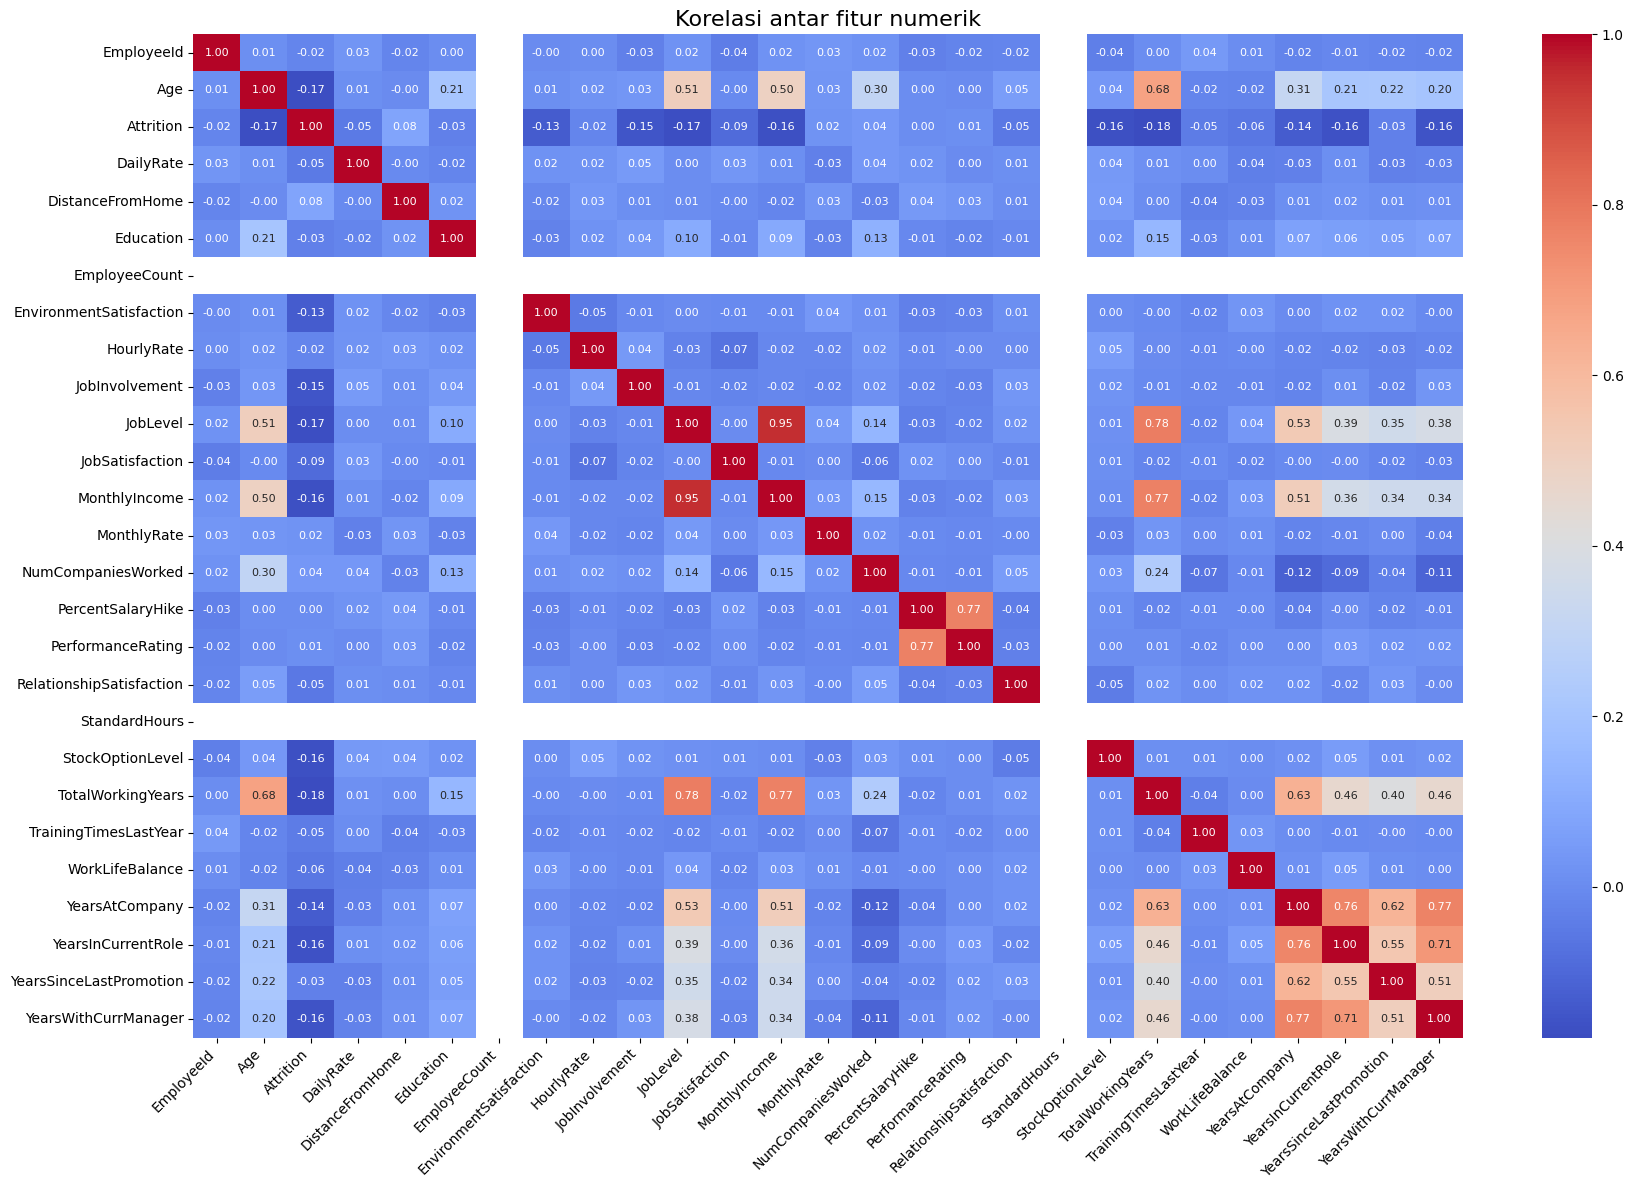

In [ ]:
# Korelasi heatmap
plt.figure(figsize=(18, 12))  # Ukuran lebih besar
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title("Korelasi antar fitur numerik", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

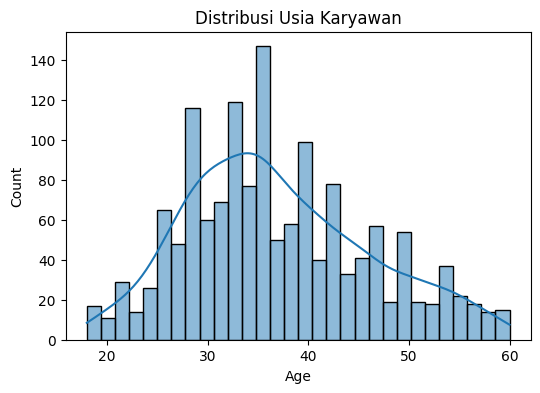

In [ ]:
# Visualisasi distribusi umur
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribusi Usia Karyawan')
plt.show()

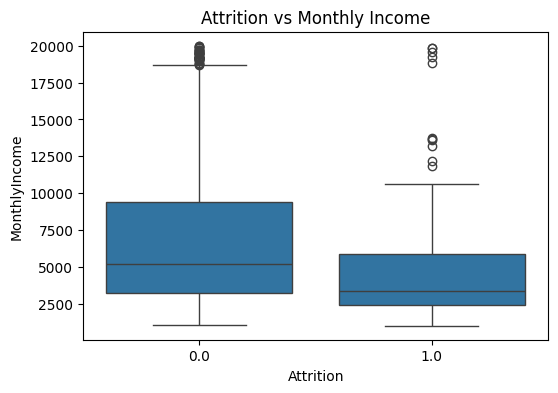

In [ ]:
# Visualisasi hubungan pendapatan dan attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Attrition vs Monthly Income')
plt.show()

In [ ]:
print("\n Jumlah Data Duplikat:", df.duplicated().sum())


 Jumlah Data Duplikat: 0


In [ ]:
# Sebelum menghapus, cek nilai unik
print("Nilai unik di Attrition:", df['Attrition'].unique())

Nilai unik di Attrition: [nan  1.  0.]


## Data Preparation / Preprocessing

In [ ]:
# Drop baris dengan Attrition null
df = df.dropna(subset=['Attrition'])

In [ ]:
# Drop kolom yang tidak diperlukan
cols_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df = df.drop(columns=cols_to_drop, errors='ignore')

In [ ]:
print("Data setelah cleaning:")
print("- Shape:", df.shape)
print("- Contoh data:")
print(df[['Attrition', 'Department', 'Age', 'MonthlyIncome']].head(3))

Data setelah cleaning:
- Shape: (1058, 32)
- Contoh data:
   Attrition              Department  Age  MonthlyIncome
1        1.0  Research & Development   37           4777
2        1.0  Research & Development   51           2461
3        0.0                   Sales   42          13525



=== EXPLORATORY ANALYSIS ===


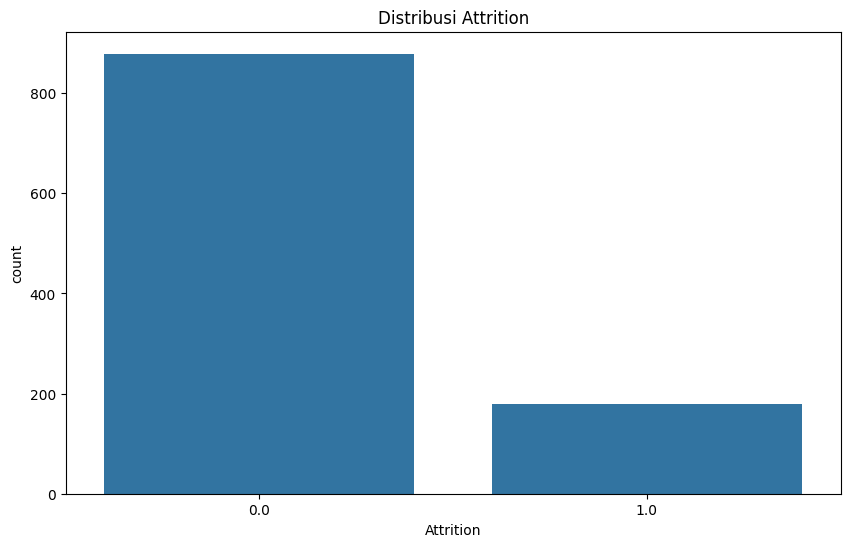

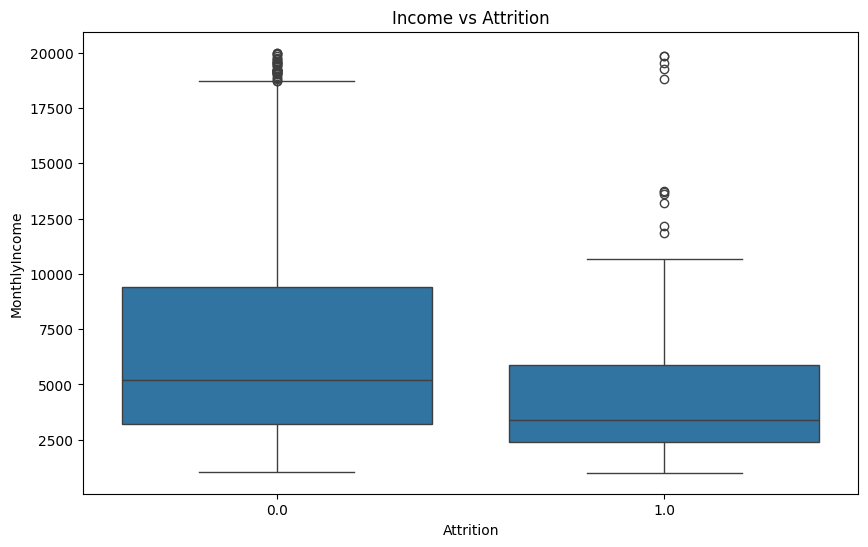

In [ ]:
print("\n=== EXPLORATORY ANALYSIS ===")

plt.figure(figsize=(10,6))
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Attrition')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Income vs Attrition')
plt.show()

In [ ]:
# Kolom yang dibutuhkan untuk dashboard
print("\n=PREPARE DASHBOARD DATA =")
df_dashboard = df.copy()[[
    'EmployeeId', 'Age', 'Gender', 'Attrition',
    'Department', 'JobRole', 'MaritalStatus',
    'JobSatisfaction', 'WorkLifeBalance',
    'YearsAtCompany', 'MonthlyIncome', 'OverTime',
    'BusinessTravel'
]]


=PREPARE DASHBOARD DATA =


In [ ]:
# Format untuk dashboard
df_dashboard['Attrition'] = df_dashboard['Attrition'].map({1: 'Yes', 0: 'No'})
df_dashboard['BusinessTravel'] = df_dashboard['BusinessTravel'].str.replace('_', ' ')

In [ ]:
print("\nContoh data dashboard:")
print(df_dashboard.head(3))


Contoh data dashboard:
   EmployeeId  Age  Gender Attrition              Department  \
1           2   37  Female       Yes  Research & Development   
2           3   51    Male       Yes  Research & Development   
3           4   42  Female        No                   Sales   

                     JobRole MaritalStatus  JobSatisfaction  WorkLifeBalance  \
1  Healthcare Representative       Married                2                1   
2         Research Scientist       Married                3                4   
3            Sales Executive       Married                2                4   

   YearsAtCompany  MonthlyIncome OverTime     BusinessTravel  
1               1           4777       No      Travel Rarely  
2              10           2461      Yes      Travel Rarely  
3              20          13525       No  Travel Frequently  


In [ ]:
print("\n=PREPARE MODELING DATA =")
df_model = df.copy()



=PREPARE MODELING DATA =


In [ ]:
# 1. ENCODING KOLOM KATEGORIKAL
# Daftar semua kolom kategorikal (termasuk yang mengandung string seperti 'Medical')
cat_cols = df_model.select_dtypes(include=['object']).columns

# Encoding untuk setiap kolom kategorikal
for col in cat_cols:
    if col != 'EmployeeId':  # Skip ID karyawan
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])

        # Simpan encoder jika perlu digunakan kembali
        joblib.dump(le, f'label_encoder_{col}.pkl')

In [ ]:
# 2. FEATURE ENGINEERING
df_model['TotalSatisfaction'] = (
    df_model['EnvironmentSatisfaction'] +
    df_model['JobSatisfaction'] +
    df_model['RelationshipSatisfaction']
)

In [ ]:
# 3. NORMALISASI
scaler = MinMaxScaler()
numeric_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])

In [ ]:
# 4. VERIFIKASI
print("\nTipe data setelah encoding:")
print(df_model.dtypes)

print("\nContoh data modeling:")
print(df_model.iloc[:3, :5])


Tipe data setelah encoding:
EmployeeId                    int64
Age                         float64
Attrition                   float64
BusinessTravel                int64
DailyRate                     int64
Department                    int64
DistanceFromHome              int64
Education                     int64
EducationField                int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int64
JobSatisfaction               int64
MaritalStatus                 int64
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears           float64
TrainingTimesLastYear         int64

In [ ]:
# Handle Class Imbalance
df_majority = df_model[df_model['Attrition'] == 0]
df_minority = df_model[df_model['Attrition'] == 1]

df_model_balanced = pd.concat([
    df_majority,
    df_minority.sample(len(df_majority), replace=True, random_state=42)
])

print("\nDistribusi setelah balancing:")
print(df_model_balanced['Attrition'].value_counts())



Distribusi setelah balancing:
Attrition
0.0    879
1.0    879
Name: count, dtype: int64


## Modeling

In [ ]:
# Pastikan X hanya berisi nilai numerik
X = df_model_balanced.drop(columns=['Attrition', 'EmployeeId'])
y = df_model_balanced['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


## Evaluation

In [ ]:
print("\n=== MODEL EVALUATION ===")

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name}:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:", round(precision_score(y_test, y_pred), 3))
    print("Recall:", round(recall_score(y_test, y_pred), 3))
    print("F1-Score:", round(f1_score(y_test, y_pred), 3))
    print("AUC-ROC:", round(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]), 3))

# Evaluate models
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(lr, X_test, y_test, "Logistic Regression")



=== MODEL EVALUATION ===

Random Forest:
Accuracy: 0.952
Precision: 0.918
Recall: 0.988
F1-Score: 0.952
AUC-ROC: 0.998

Logistic Regression:
Accuracy: 0.727
Precision: 0.687
Recall: 0.793
F1-Score: 0.736
AUC-ROC: 0.8


In [ ]:
print("\n= SAVING RESULTS =")

# Save data
df_dashboard.to_csv('hr_analytics_dashboard.csv', index=False)
df_model_balanced.to_csv('hr_analytics_modeling.csv', index=False)



= SAVING RESULTS =


In [ ]:
# Save models
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
files.download('hr_analytics_dashboard.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Convert data yang dinormalisasi

In [ ]:
# Cek data final
print("Data Dashboard:")
print(df_dashboard.head(3))

print("\nData Modeling:")
print(df_model_balanced[['Age', 'MonthlyIncome', 'Attrition']].head(3))

Data Dashboard:
   EmployeeId  Age  Gender Attrition              Department  \
1           2   37  Female       Yes  Research & Development   
2           3   51    Male       Yes  Research & Development   
3           4   42  Female        No                   Sales   

                     JobRole MaritalStatus  JobSatisfaction  WorkLifeBalance  \
1  Healthcare Representative       Married                2                1   
2         Research Scientist       Married                3                4   
3            Sales Executive       Married                2                4   

   YearsAtCompany  MonthlyIncome OverTime     BusinessTravel  
1               1           4777       No      Travel Rarely  
2              10           2461      Yes      Travel Rarely  
3              20          13525       No  Travel Frequently  

Data Modeling:
        Age  MonthlyIncome  Attrition
3  0.571429       0.659084        0.0
6  0.523810       0.339547        0.0
8  0.428571       0.0602